## Analyzing Factors Influencing Used Car Prices
###         - Objective: Identify key drivers of used car prices and quantify their impact.

https://www.kaggle.com/code/khaledsayedaaaaa/eda-car-price/input

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
plt.style.use('dark_background')

In [4]:
df = pd.read_csv('kaggle_car_prices.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
df.shape

(558837, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [7]:
#showing count of unique values per column
df.nunique()

year                34
make                96
model              973
trim              1963
body                87
transmission         4
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

In [8]:
df['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

In [9]:
df['make'].value_counts().head(10)

make
Ford         93554
Chevrolet    60197
Nissan       53946
Toyota       39871
Dodge        30710
Honda        27206
Hyundai      21816
BMW          20719
Kia          18077
Chrysler     17276
Name: count, dtype: int64

---

# Data Cleaning and Normalization

In this step, we prepared the dataset by performing the following actions:

1. **Checked for Missing Values**

2. **Checked for Duplicate Rows**

3. **Dropped Irrelevant Columns**

4. **Processed Datetime Column**:
   - Removed timezone information from the `saledate` column.
   - Converted the `saledate` column to datetime format.
   - Adjusted timestamps by adding one hour for rows marked with "PDT"

5. **Standardized Categorical Data**: 
   - Normalized variations in the `make` and `body` columns to standardize categories.
   - Applied transformations to unify data formats for consistency.






In [10]:
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop(columns=['vin'], inplace=True)

In [13]:
df.dropna(inplace=True)

>    #### Converting ```saledate``` to datetime -> When it's PDT (GMT-0700), the time should be adjusted by +1 hour compared to PST (GMT-0800).

In [14]:
df['saledate'].sample(10)

154847    Thu Feb 19 2015 01:30:00 GMT-0800 (PST)
431620    Thu May 21 2015 03:00:00 GMT-0700 (PDT)
480005    Thu Jun 04 2015 05:30:00 GMT-0700 (PDT)
192334    Wed Jan 28 2015 02:10:00 GMT-0800 (PST)
503254    Wed Jun 03 2015 02:30:00 GMT-0700 (PDT)
45096     Mon Dec 22 2014 09:30:00 GMT-0800 (PST)
89237     Wed Jan 07 2015 12:30:00 GMT-0800 (PST)
97398     Wed Jan 07 2015 10:30:00 GMT-0800 (PST)
507873    Fri Jun 05 2015 04:55:00 GMT-0700 (PDT)
81029     Wed Jul 01 2015 09:15:00 GMT-0700 (PDT)
Name: saledate, dtype: object

In [15]:
#unique time-zones
df['saledate'].str[-5:].unique()

array(['(PST)', '(PDT)'], dtype=object)

In [16]:
# a mask for PDT rows
pdt_mask = df['saledate'].str.contains('PDT')

# extracting datetime without timezone info
df['saledate'] = df['saledate'].str.extract('(.*?GMT)')[0].str[:-3]

# converting to datetime
df['saledate'] = pd.to_datetime(df['saledate'])

# adding 1 hour to PDT rows
df.loc[pdt_mask, 'saledate'] += pd.Timedelta(hours=1)

In [17]:
#verifying from the sample above
indices = [324030, 224914]
df['saledate'].loc[indices]

324030   2015-03-10 03:30:00
224914   2015-02-09 05:00:00
Name: saledate, dtype: datetime64[ns]

In [18]:
df.dtypes

year                     int64
make                    object
model                   object
trim                    object
body                    object
transmission            object
state                   object
condition              float64
odometer               float64
color                   object
interior                object
seller                  object
mmr                    float64
sellingprice           float64
saledate        datetime64[ns]
dtype: object

>    #### standardizing categorical data -> `make` and `body` columns

In [19]:
df.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 12:30:00
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 12:30:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15 04:30:00
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29 04:30:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 12:30:00


In [20]:
df['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Cadillac', 'Acura', 'Lexus', 'Hyundai', 'Buick', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'FIAT', 'Chrysler',
       'Ferrari', 'Honda', 'GMC', 'Ram', 'smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'Saab', 'Suzuki',
       'Oldsmobile', 'Rolls-Royce', 'Isuzu', 'Plymouth', 'Tesla',
       'Aston Martin', 'Geo', 'Fisker', 'Daewoo', 'Lamborghini', 'Lotus'],
      dtype=object)

In [21]:
# Standardize case, except for known abbreviations
abbreviations = ['BMW', 'GMC', 'FIAT', 'MINI', 'GMC', 'RAM', 'HUMMER']
df['make'] = df['make'].apply(lambda x: x.upper() if x.upper() in abbreviations else x.title())

In [22]:
df['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Cadillac', 'Acura', 'Lexus', 'Hyundai', 'Buick', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'FIAT', 'Chrysler',
       'Ferrari', 'Honda', 'GMC', 'RAM', 'Smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'Saab', 'Suzuki',
       'Oldsmobile', 'Rolls-Royce', 'Isuzu', 'Plymouth', 'Tesla',
       'Aston Martin', 'Geo', 'Fisker', 'Daewoo', 'Lamborghini', 'Lotus'],
      dtype=object)

In [23]:
df['transmission'].unique()

array(['automatic', 'manual'], dtype=object)

In [24]:
df['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'CTS Coupe', 'SuperCrew', 'E-Series Van',
       'Extended Cab', 'SuperCab', 'G Convertible', 'Koup', 'Regular Cab',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'G37 Coupe', 'Mega Cab',
       'Cab Plus 4', 'Q60 Coupe', 'Beetle Convertible', 'TSX Sport Wagon',
       'Promaster Cargo Van', 'Cab Plus', 'GranTurismo Convertible',
       'CTS-V Wagon', 'Ram Van', 'convertible', 'minivan', 'Transit Van',
       'van', 'regular-cab', 'suv', 'g sedan', 'g coupe', 'hatchback',
       'king cab', 'supercrew', 'g convertible', 'coupe', 'crew cab',
       'wagon', 'e-series van', 'regular cab', 'quad cab',
       'g37 convertible', 'supercab', 'extended cab', 'crewmax cab',
       'double c

In [25]:
df['body'].value_counts()

body
Sedan          174647
SUV            100347
sedan           36651
suv             20621
Hatchback       19351
                ...  
Cab Plus            3
cab plus 4          1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: count, Length: 85, dtype: int64

In [26]:
df['body'] = df['body'].str.lower()

# Combined replacement dictionary
replacements = {
    # Handle all pattern based replacements first
    '.*convertible.*': 'Convertible',
    '.*van.*': 'Van',
    '.*cab.*': 'Truck',
    'supercrew': 'Truck', 
    '.*coupe.*': 'Coupe',
    'koup': 'Coupe',
    '.*wagon.*': 'Wagon', 
    '^suv$': 'SUV',
    '^sedan$': 'Sedan',
    'hatchback': 'Hatchback',
    'g sedan': 'Sedan'
}

for pattern, replacement in replacements.items():
    df['body'] = df['body'].str.replace(pattern, replacement, case=False, regex=True)

In [27]:
df['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Truck', 'Van'], dtype=object)

In [28]:
df['body'].value_counts()

body
Sedan          218237
SUV            120968
Truck           40496
Van             26633
Hatchback       23821
Coupe           18161
Wagon           14263
Convertible      9746
Name: count, dtype: int64

---
## Statistical analysis

In [29]:
round(df.describe(),2)

,year,condition,odometer,mmr,sellingprice,saledate
count,472325.00,472325.00,472325.00,472325.00,472325.00,472325
mean,2010.21,30.77,66701.73,13837.06,13690.51,2015-03-07 09:32:04.438469120
min,1990.00,1.00,1.00,25.00,1.00,2014-01-01 09:15:00
25%,2008.00,24.00,28137.00,7425.00,7200.00,2015-01-22 01:30:00
50%,2012.00,35.00,51085.00,12300.00,12200.00,2015-02-17 01:30:00
75%,2013.00,41.00,96590.00,18300.00,18200.00,2015-05-21 07:00:00
max,2015.00,49.00,999999.00,182000.00,230000.00,2015-07-21 03:30:00
std,3.82,13.29,51939.59,9532.23,9613.03,NaN


In [30]:
#filtering the dataframe for mmr and sellingprice
df = df[
    (df['mmr'] >= 1000) & (df['mmr'] <= 300000) & 
    (df['sellingprice'] >= 1000) & (df['sellingprice'] <= 300000)
    ]

df[['mmr', 'sellingprice']].describe().round(2)

,mmr,sellingprice
count,458731.00,458731.00
mean,14210.66,14074.87
std,9416.54,9487.40
min,1000.00,1000.00
25%,8000.00,7800.00
50%,12550.00,12500.00
75%,18500.00,18400.00
max,182000.00,230000.00


In [31]:
df.shape

(458731, 15)

---
## Adding new features

In [32]:
df['price_deviation'] = df['mmr'] - df['sellingprice']

In [33]:
df['price_deviation'].describe()

count    458731.000000
mean        135.790134
std        1753.561818
min     -207200.000000
25%        -675.000000
50%          25.000000
75%         800.000000
max       87750.000000
Name: price_deviation, dtype: float64

- Min -$99950 (car sold for much more than MMR)
    - there are extreme negative values suggest cars sold for much more than MMR which is unusual for used cars.

In [34]:
top_10_deviations = df.nlargest(10, 'price_deviation')
top_10_deviations


,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,price_deviation
405316,2013,Mercedes-Benz,G-Class,G63 AMG,SUV,automatic,pa,48.0,23947.0,black,black,adcock brothers inc,110000.0,22250.0,2015-03-20 03:00:00,87750.0
404667,2015,Chevrolet,Tahoe,LTZ,SUV,automatic,fl,2.0,5210.0,black,—,enterprise vehicle exchange / tra / rental / t...,52700.0,8500.0,2015-03-10 03:00:00,44200.0
505951,2014,Chevrolet,Corvette Stingray,Z51,Coupe,automatic,tx,45.0,12470.0,red,black,pro financial inc,57600.0,15700.0,2015-06-03 04:20:00,41900.0
401848,2014,Chevrolet,Corvette Stingray,Base,Convertible,automatic,fl,4.0,13320.0,yellow,gray,gm remarketing,57500.0,19400.0,2015-03-23 07:00:00,38100.0
1565,2012,Mercedes-Benz,SL-Class,SL550,Convertible,automatic,ca,39.0,26776.0,silver,black,sports trend auto sales,58400.0,20500.0,2015-01-29 04:30:00,37900.0
68346,2014,Jaguar,XJ,XJL Portfolio,Sedan,automatic,wi,1.0,9501.0,black,black,dollar thrifty damage liquidation,77000.0,40000.0,2015-02-04 01:30:00,37000.0
479491,2014,Land Rover,Range Rover,Ebony Edition,SUV,automatic,ca,49.0,9925.0,white,black,land rover north america llc,97000.0,60000.0,2015-06-04 06:30:00,37000.0
409701,2015,GMC,Yukon,SLT,SUV,automatic,ny,2.0,1.0,black,black,hertz/tra,54700.0,18200.0,2015-05-06 03:00:00,36500.0
554571,2008,Lexus,LX 570,Base,SUV,automatic,ca,2.0,58499.0,silver,black,lexus financial services,35200.0,1400.0,2015-07-01 10:30:00,33800.0
131746,2014,Ford,Fusion,SE,Sedan,automatic,mi,45.0,25317.0,orange,black,avis budget group,47800.0,14200.0,2015-06-25 03:00:00,33600.0


In [35]:
df.shape

(458731, 16)

In [36]:
# df.loc[344905, 'sellingprice'] = 23000.0
# df.loc[344905, 'price_deviation'] = 200
# df.loc[344905]

In [61]:
df = df[df['price_deviation'] >= -20000]
df.shape

(458683, 17)

In [62]:
df['price_deviation'].describe()

count    458683.000000
mean        139.178025
std        1696.535259
min      -19950.000000
25%        -675.000000
50%          25.000000
75%         800.000000
max       87750.000000
Name: price_deviation, dtype: float64

In [ ]:
# adding new car age column
df['car_age'] = df['saledate'].dt.year - df['year']
df['car_age'].describe()

count    458683.000000
mean          4.438115
std           3.476676
min          -1.000000
25%           2.000000
50%           3.000000
75%           7.000000
max          25.000000
Name: car_age, dtype: float64

'''
Note on negative Car Ages (-1):
- This is actually normal in the automotive industry, Manufacturers typically release new models several months before the calendar year, so having cars with "-1" age in our data is valid and reflects industry practice
'''

---



## Visualiztion

In [64]:
df.sample(10)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,price_deviation,car_age
543765,2013,Chevrolet,Equinox,LTZ,SUV,automatic,az,39.0,57365.0,white,black,the hertz corporation,15400.0,15500.0,2015-06-18 06:30:00,-100.0,2
8026,2012,RAM,1500,ST,Truck,automatic,ne,29.0,85441.0,white,gray,enterprise vehicle exchange/davenport,18950.0,16200.0,2015-01-08 02:30:00,2750.0,3
263987,2012,Mercedes-Benz,M-Class,ML350 4MATIC,SUV,automatic,nj,33.0,45746.0,black,black,mercedes-benz financial services,32500.0,32000.0,2015-02-11 01:30:00,500.0,3
64629,2010,Honda,Accord,LX-P,Sedan,automatic,ga,19.0,92347.0,black,beige,ahfc/honda lease trust/hvt inc.,9050.0,7300.0,2014-12-30 13:00:00,1750.0,4
183212,2012,Honda,Pilot,EX-L,SUV,automatic,pa,44.0,29087.0,gray,black,pohanka lexus,25000.0,25750.0,2015-01-23 01:00:00,-750.0,3
357768,2013,Ford,Mustang,V6,Convertible,automatic,fl,19.0,62238.0,black,black,dtg operations inc,13750.0,12200.0,2015-03-04 01:10:00,1550.0,2
266867,2012,Honda,Pilot,EX-L,SUV,automatic,pa,37.0,37421.0,gray,black,best auto wholesale,23400.0,23200.0,2015-02-27 01:00:00,200.0,3
391948,2006,Dodge,Charger,SE,Sedan,automatic,ca,23.0,158188.0,blue,gray,m & n financial,4150.0,3200.0,2015-03-05 04:00:00,950.0,9
66826,2007,Volkswagen,Jetta,Wolfsburg Edition,Sedan,automatic,fl,26.0,151676.0,silver,black,first commonwealth fcu,2300.0,1600.0,2015-01-07 09:15:00,700.0,8
123312,2013,RAM,1500,Tradesman,Truck,automatic,md,49.0,13138.0,gray,gray,chrysler capital,15750.0,16350.0,2015-01-20 01:30:00,-600.0,2


> #### correlation_matrix for numerical features

In [50]:
numerical_features = ['mmr', 'sellingprice', 'condition', 'odometer']
correlation_matrix = df[numerical_features].corr()
correlation_matrix.round(3)

,mmr,sellingprice,condition,odometer
mmr,1.000,0.984,0.240,-0.568
sellingprice,0.984,1.000,0.283,-0.564
condition,0.240,0.283,1.000,-0.272
odometer,-0.568,-0.564,-0.272,1.000


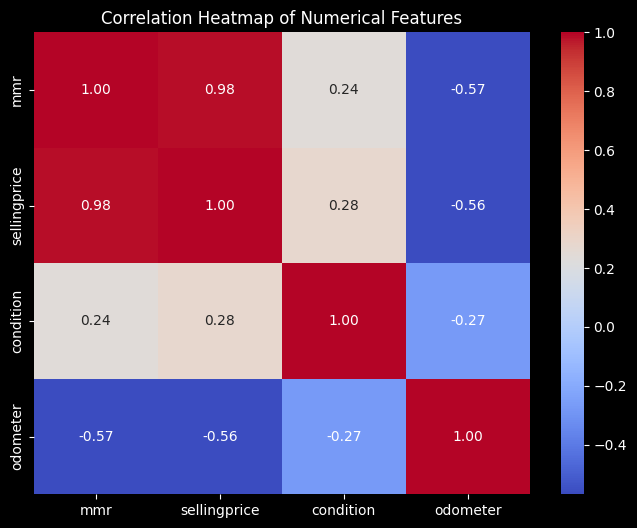

In [51]:
#heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

EDA Analysis:

    - What factors most influence a car’s selling price (e.g., brand, mileage, year, condition)?

    - How does the Manufacturer's Recommended Retail Price (MMR) compare to the actual selling price?

    - Are there trends in sales over time (monthly, yearly)?

    - Which brands/models hold their value best?

    - Do color, interior, or seller type impact price?

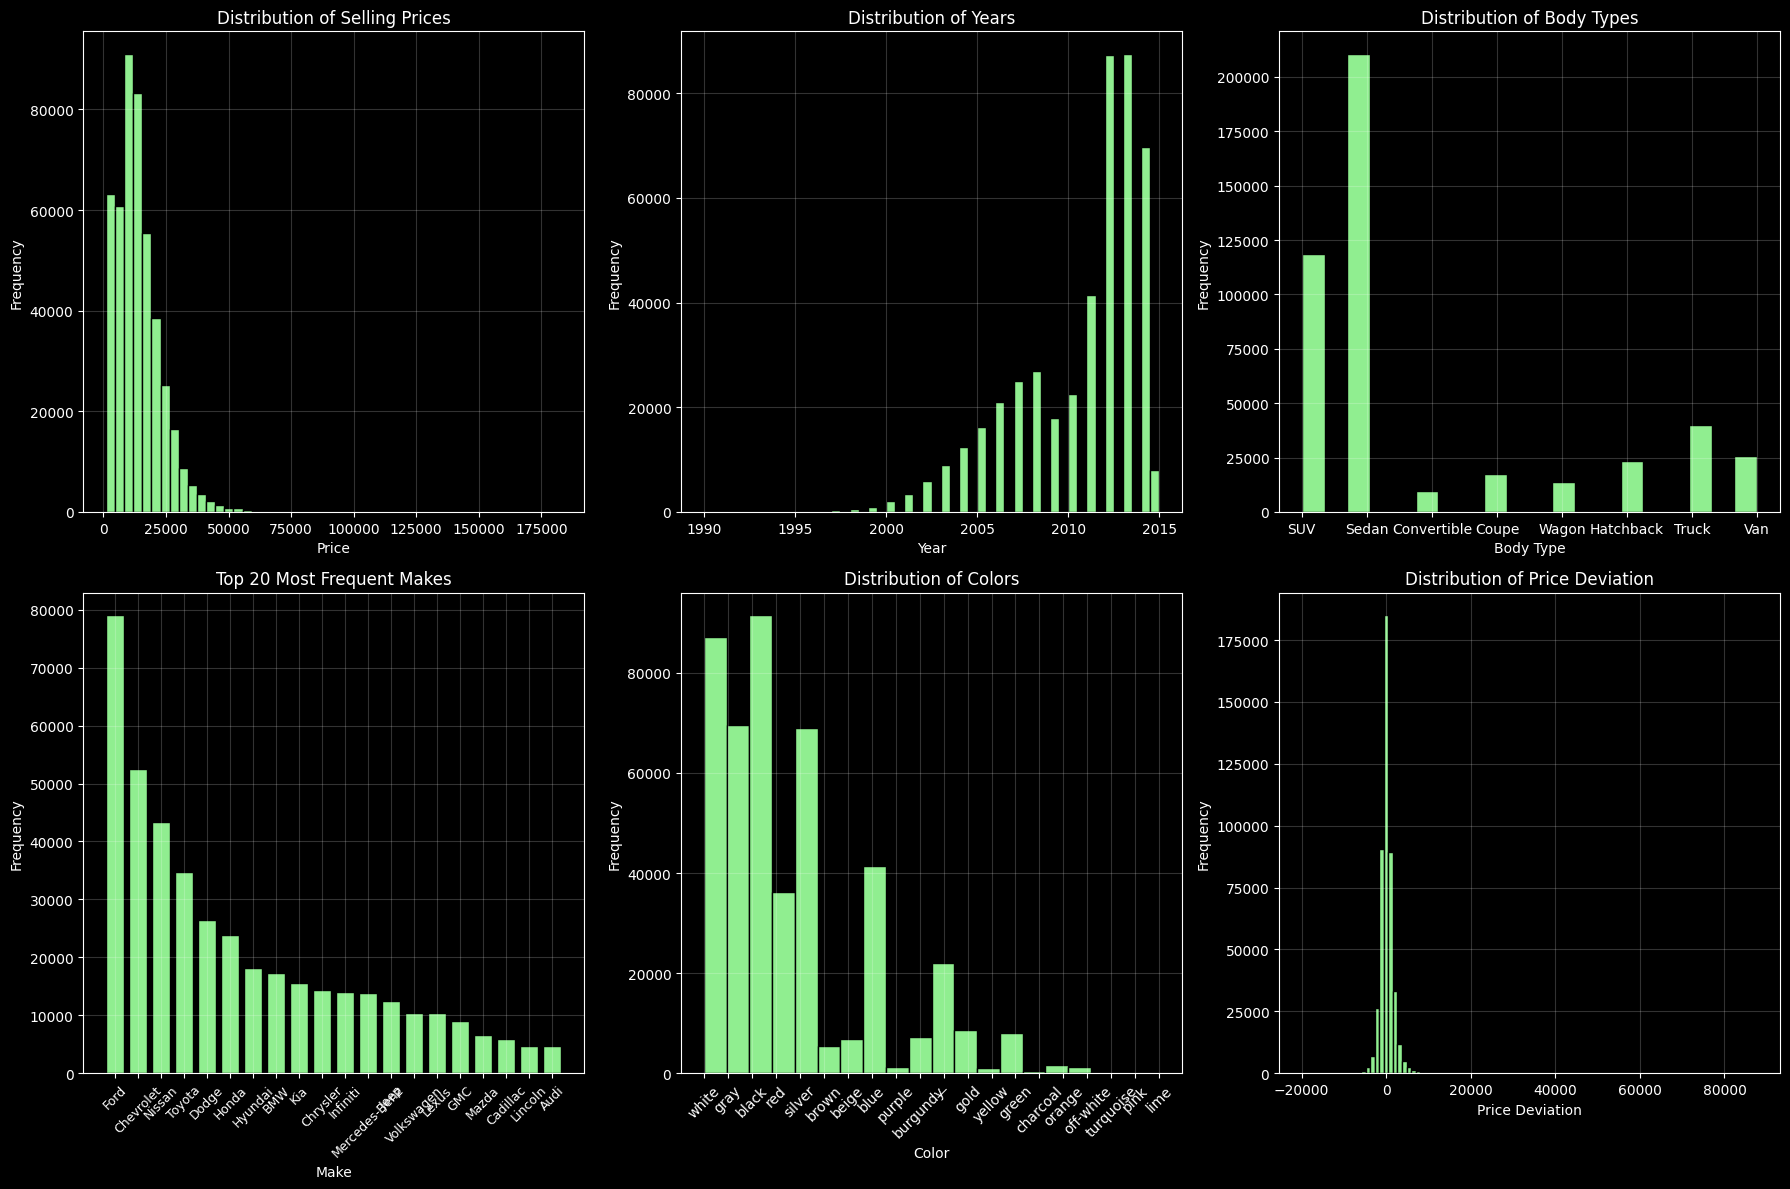

In [ ]:
#Plotting distributions and comparisons in subplots: Selling Price, Year, Body Type, Make, Color, and Price Deviation

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

#Distribution of Selling Prices
axes[0, 0].hist(df['sellingprice'], bins=50, color='lightgreen', edgecolor='black')
axes[0, 0].set_title('Distribution of Selling Prices')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(alpha=0.2)

#Distribution of Years
axes[0, 1].hist(df['year'], bins=50, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution of Years')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(alpha=0.2)

#Distribution of Body Types
axes[0, 2].hist(df['body'], bins=20, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Distribution of Body Types')
axes[0, 2].set_xlabel('Body Type')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].grid(alpha=0.2)

#Top 20 Most Frequent Makes
top_makes = df['make'].value_counts().head(20)
axes[1, 0].bar(top_makes.index, top_makes.values, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Top 20 Most Frequent Makes')
axes[1, 0].set_xlabel('Make')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(alpha=0.2)
axes[1, 0].tick_params(axis='x', rotation=45, labelsize=9)

#Distribution of Colors
axes[1, 1].hist(df['color'], bins=20, color='lightgreen', edgecolor='black')
axes[1, 1].set_title('Distribution of Colors')
axes[1, 1].set_xlabel('Color')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(alpha=0.2)
axes[1, 1].tick_params(axis='x', rotation=45)

#Distribution of Price Deviation
axes[1, 2].hist(df['price_deviation'], bins=100, color='lightgreen', edgecolor='black')
axes[1, 2].set_title('Distribution of Price Deviation')
axes[1, 2].set_xlabel('Price Deviation')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].grid(alpha=0.2)

plt.tight_layout()
plt.show()

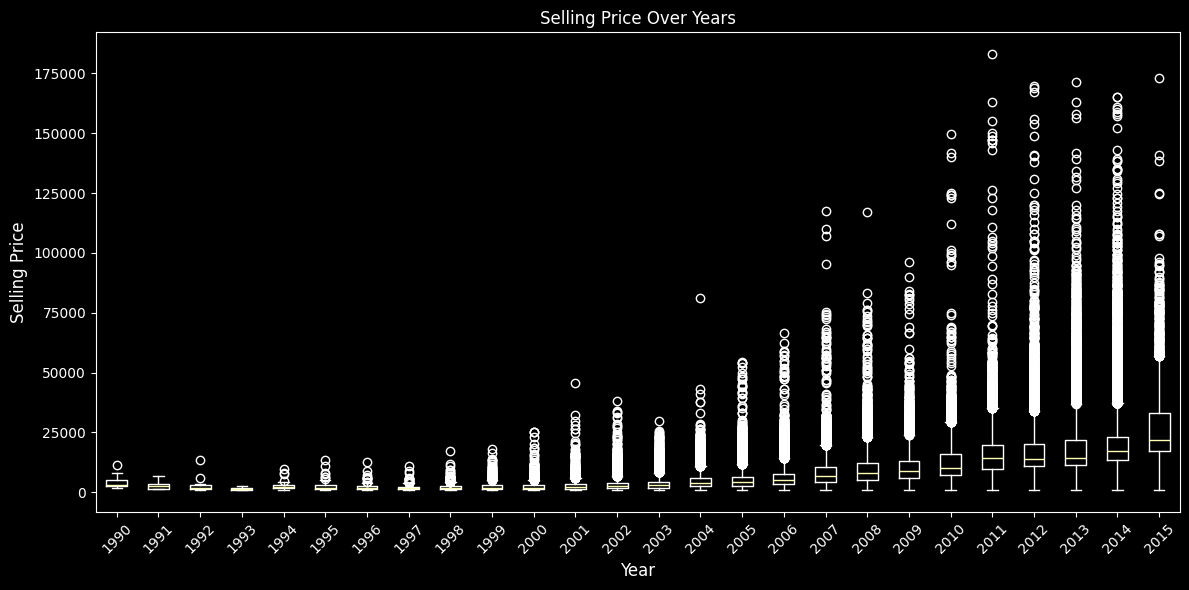

In [53]:
# Year vs Selling Price (Boxplot)
plt.figure(figsize=(12, 6))
years = sorted(df["year"].unique())
plt.boxplot([df[df["year"] == year]["sellingprice"] for year in years], tick_labels=years)
plt.xticks(rotation=45, fontsize=10) 
plt.title("Selling Price Over Years")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.tight_layout()

plt.style.use('dark_background')
plt.show()

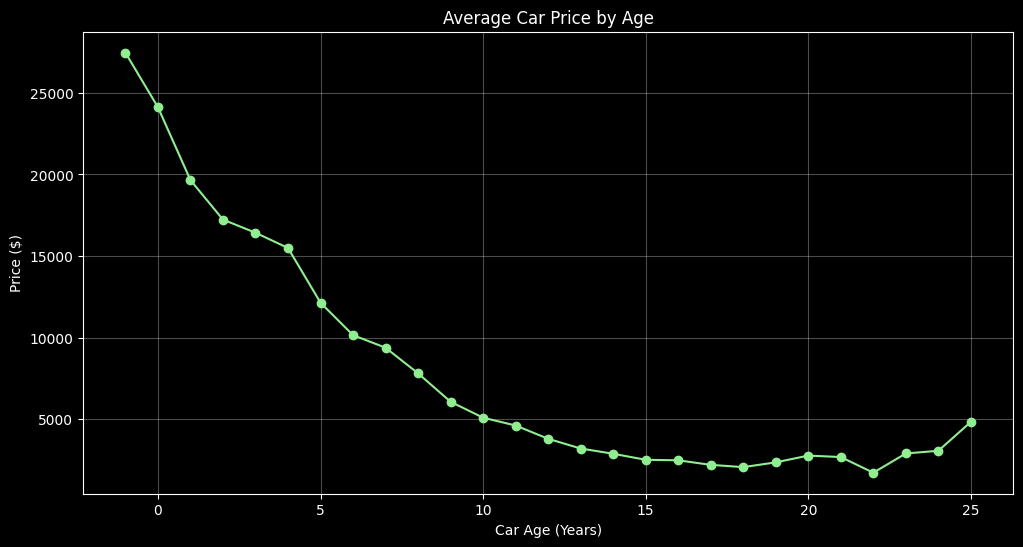

In [71]:
# average price per age
avg_prices = df.groupby('car_age')['sellingprice'].mean()

# Simple line plot
plt.figure(figsize=(12, 6))
plt.plot(avg_prices, color='lightgreen', marker='o')
plt.title('Average Car Price by Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.show()

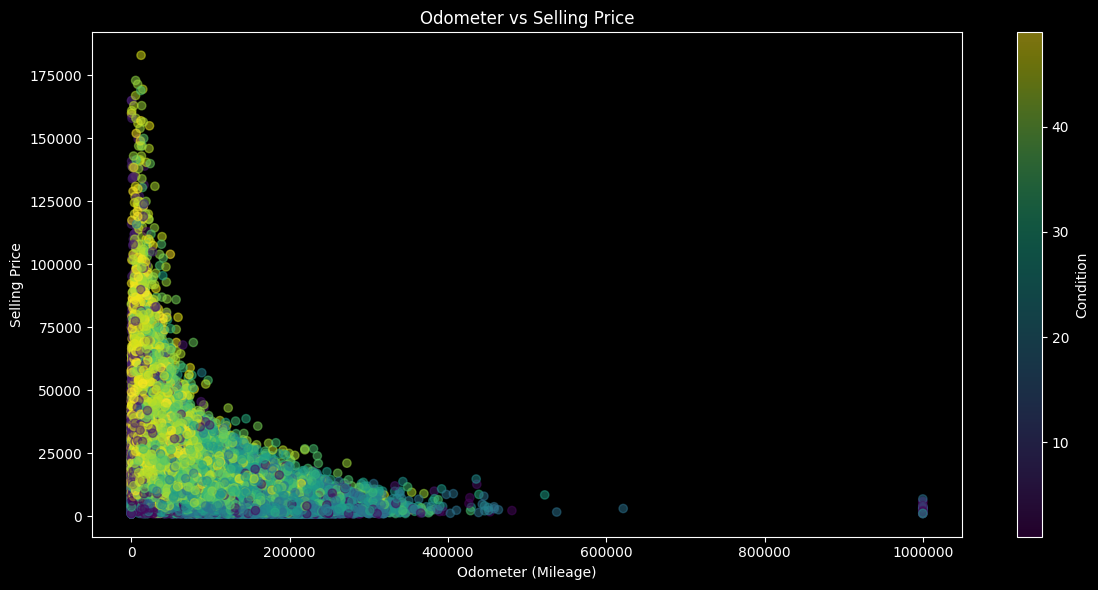

In [55]:
# Odometer vs Selling Price - Scatter Plot with adjusted axis scaling
plt.style.use('dark_background')


plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['odometer'], df["sellingprice"], c=df["condition"], alpha=0.5)
cbar = plt.colorbar(scatter)
cbar.set_label("Condition")
plt.title("Odometer vs Selling Price")
plt.xlabel("Odometer (Mileage)")
plt.ylabel("Selling Price")

# stops the scientific notation
plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

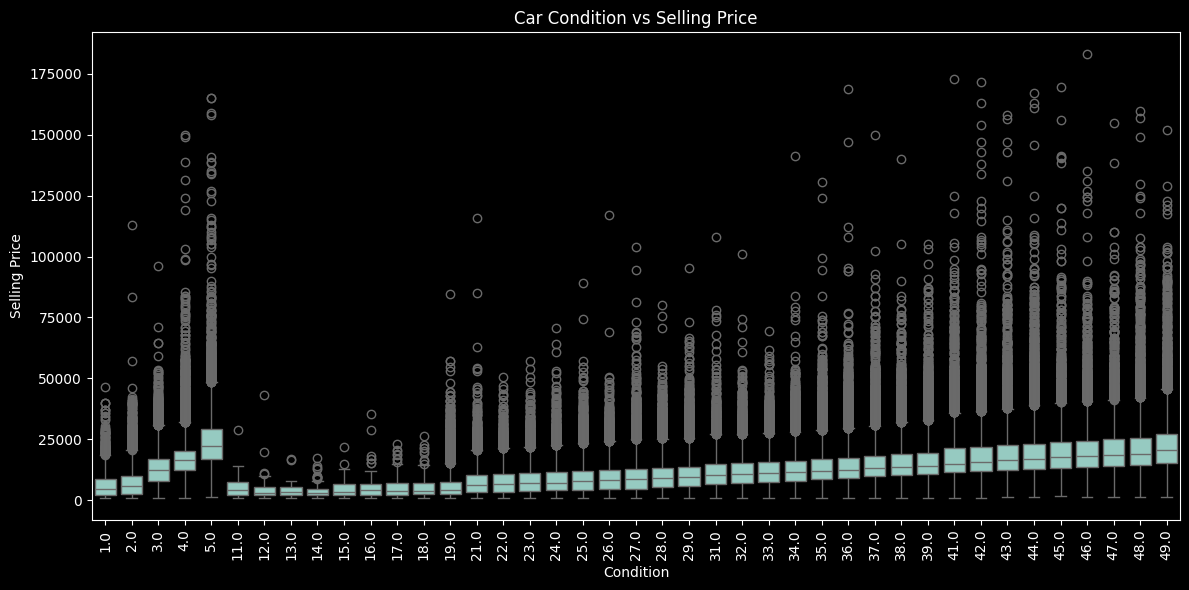

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='condition', y='sellingprice')
plt.title("Car Condition vs Selling Price")
plt.xlabel("Condition")
plt.ylabel("Selling Price")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

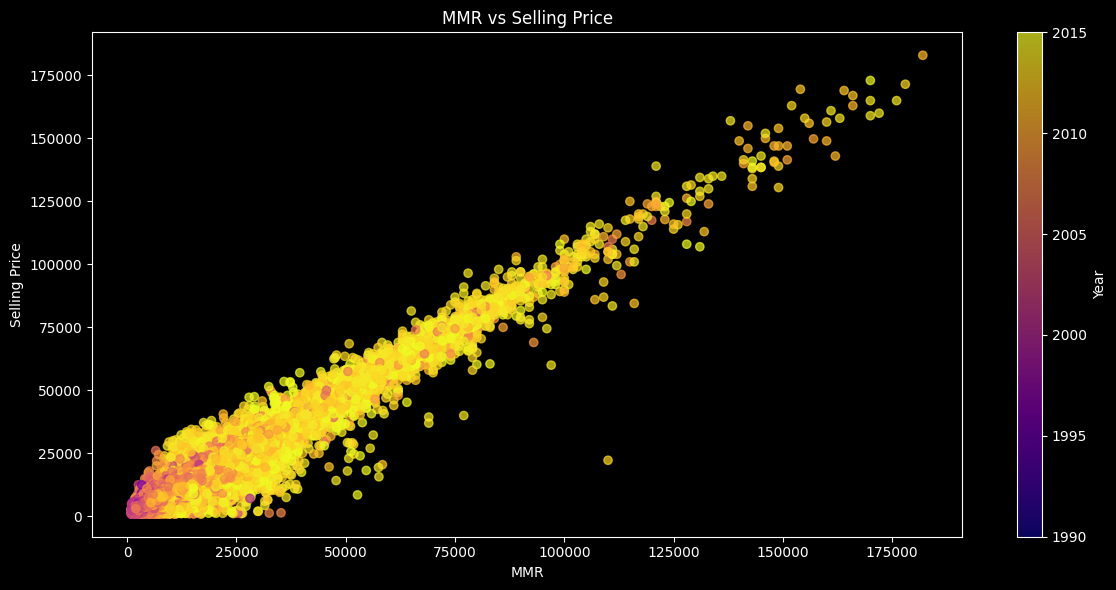

In [57]:
# MMR vs Selling Price (Scatter Plot)
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df["mmr"], df["sellingprice"], c=df["year"], cmap="plasma", alpha=0.7)
cbar = plt.colorbar(scatter)
cbar.set_label("Year")
plt.title("MMR vs Selling Price")
plt.xlabel("MMR")
plt.ylabel("Selling Price")
plt.tight_layout()
plt.show()

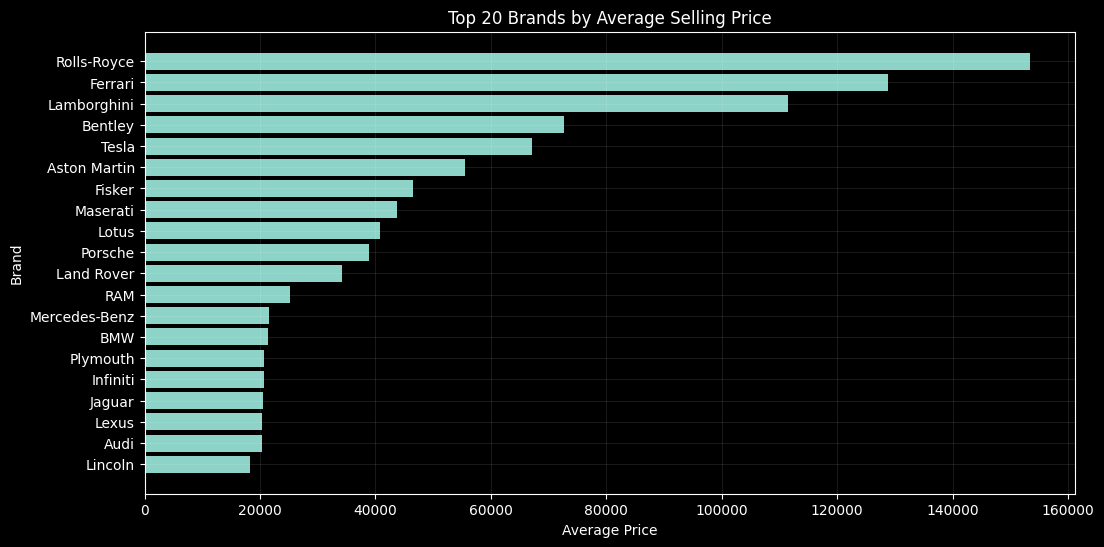

In [58]:
# Calculate average price per brand
brand_price = df.groupby('make')['sellingprice'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))

plt.barh(brand_price.index[::-1], brand_price.values[::-1])  # Reversing the order for bars so it can be sorted graph
plt.title('Top 20 Brands by Average Selling Price')
plt.xlabel('Average Price')
plt.ylabel('Brand')
plt.grid(alpha=0.1)
plt.show()

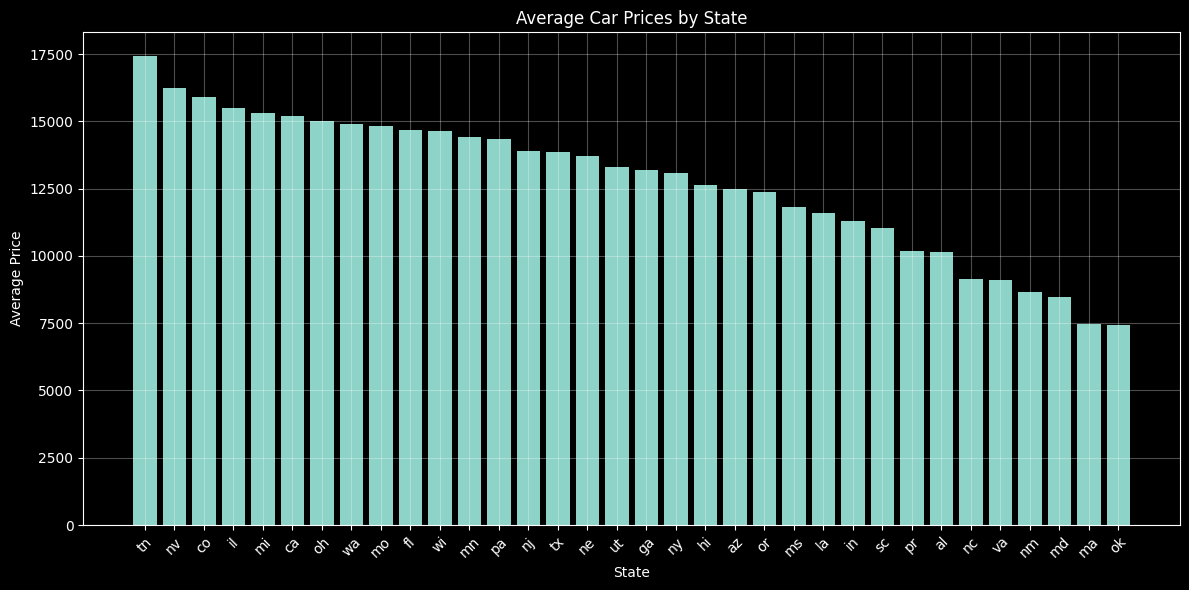

In [59]:
# Geographic Analysis
plt.figure(figsize=(12, 6))
state_prices = df.groupby('state')['sellingprice'].mean().sort_values(ascending=False)
plt.bar(state_prices.index, state_prices.values)
plt.title('Average Car Prices by State')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

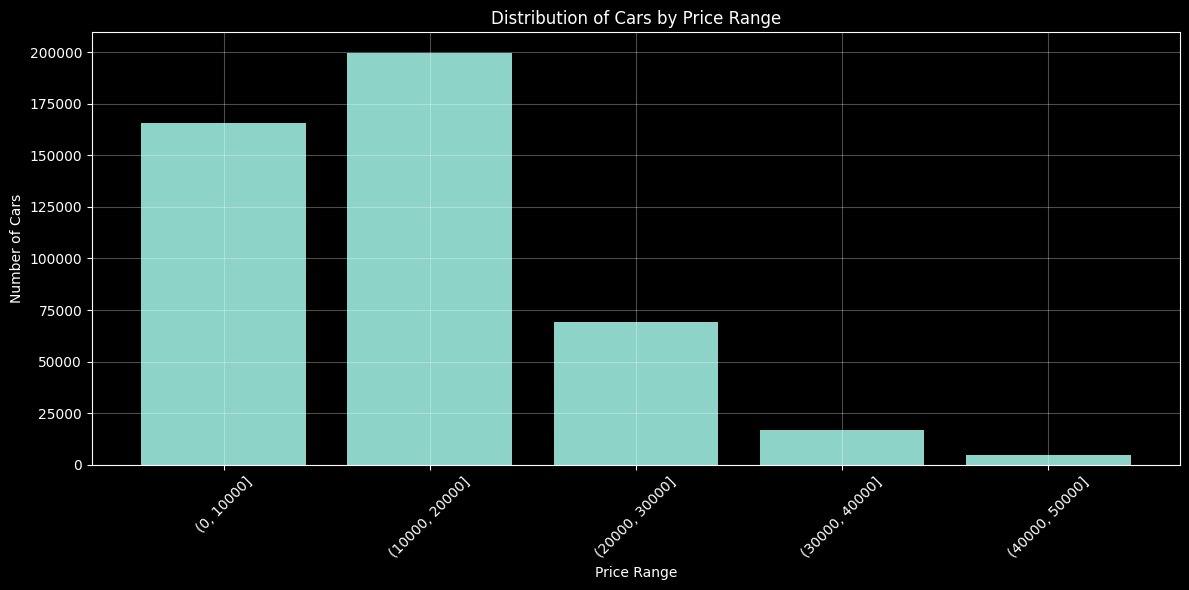

In [60]:
# Price Range Analysis
plt.figure(figsize=(12, 6))
price_ranges = pd.cut(df['sellingprice'], bins=[0, 10000, 20000, 30000, 40000, 50000])
price_range_counts = price_ranges.value_counts().sort_index()
plt.bar(price_range_counts.index.astype(str), price_range_counts.values)
plt.title('Distribution of Cars by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()